# 🌎 **Air Quality Prediction** 

## **Project Overview**
This notebook explores **Air Quality Index (AQI)** prediction across different states in the US. Using machine learning models like **Linear Regression**, we aim to predict AQI based on historical pollutant data.
---
## **📊 Data Overview**
The dataset contains:
- **Particle Concentration Levels**: PM2.5, PM10, NO2, O3, CO
- **Location**: State and Population
---
## **📈 Results and Evaluation**
Key evaluation metrics:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R-Squared (R²)**
We'll also visualize **predicted vs. actual AQI values** to gauge model performance.
---


In [80]:
# Data Cleaning
import pandas as pd 
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA


# Split Data for Models
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score


# statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [25]:
df = pd.read_csv('../Processed_Data/AQI_Final.csv')

In [26]:
df.describe()

,Year,Ozone Average,Carbon Average,Nitrogen Average,Sulfur Average,PM2.5 Average,PM10 Average,Ozone AQI,Carbon AQI,Nitrogen AQI,Sulfur AQI,PM2.5 AQI,PM10 AQI,Overall AQI,Population,Renewable Vehicles,Non-Renewable Vehicles
count,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02
mean,2019.500000,0.0,0.257750,11.460000,1.925000,7.269250,15.246750,0.0,2.695000,10.715000,2.555000,39.930000,13.857500,40.512500,6574.093497,6.361850e+05,4.825954e+06
std,2.294157,0.0,0.084604,5.274272,3.104589,2.186534,9.785568,0.0,1.093143,4.935552,4.409715,11.413403,8.901702,9.948985,7324.928149,6.966617e+05,5.287238e+06
min,2016.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,577.664000,5.620000e+04,4.841000e+05
25%,2017.750000,0.0,0.200000,8.000000,1.000000,6.200000,11.400000,0.0,2.000000,8.000000,1.000000,34.000000,10.000000,35.000000,1845.113000,1.848250e+05,1.555300e+06
50%,2019.500000,0.0,0.300000,12.000000,1.000000,7.600000,16.300000,0.0,3.000000,11.000000,1.000000,42.000000,15.000000,42.000000,4549.951500,4.893500e+05,3.439550e+06
75%,2021.250000,0.0,0.300000,15.000000,2.000000,8.600000,20.025000,0.0,3.000000,14.000000,3.000000,48.000000,18.000000,48.000000,7641.659500,7.697250e+05,5.907750e+06
max,2023.000000,0.0,0.500000,27.000000,39.000000,14.500000,51.300000,0.0,6.000000,25.000000,55.000000,61.000000,47.000000,61.000000,39503.200000,4.886700e+06,3.192720e+07


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    400 non-null    int64  
 1   State Name              400 non-null    object 
 2   Ozone Average           400 non-null    int64  
 3   Carbon Average          400 non-null    float64
 4   Nitrogen Average        400 non-null    int64  
 5   Sulfur Average          400 non-null    int64  
 6   PM2.5 Average           400 non-null    float64
 7   PM10 Average            400 non-null    float64
 8   Ozone AQI               400 non-null    int64  
 9   Carbon AQI              400 non-null    int64  
 10  Nitrogen AQI            400 non-null    int64  
 11  Sulfur AQI              400 non-null    int64  
 12  PM2.5 AQI               400 non-null    int64  
 13  PM10 AQI                400 non-null    int64  
 14  Overall AQI             400 non-null    in

In [28]:
df = df.dropna()

__**Linear Regression**__

In [ ]:
df.reset_index(inplace=True)


In [58]:
agg_data = df.groupby('Year', as_index=False)['Overall AQI'].mean()


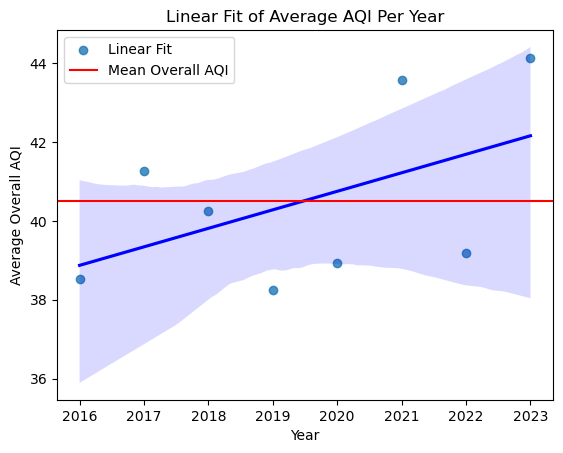

In [65]:
ax = sns.regplot(data=agg_data, x='Year', y='Overall AQI', scatter=True, line_kws={"color": "blue"}, label='Linear Fit')
# Add vertical and horizontal mean lines
ax.axhline(y=agg_data['Overall AQI'].mean(), color='red', label='Mean Overall AQI')
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Overall AQI')
plt.legend()
plt.title('Linear Fit of Average AQI Per Year')
plt.show()


In [164]:
def linearRegressionModel(df):
    # Apply one-hot encoding to 'State Name' to convert categorical data to numerical
    df_encoded = pd.get_dummies(df, columns=['State Name'], drop_first=True)

    # Define features (X) and target (y)
    X = df_encoded[['Population', 'Non-Renewable Vehicles'] + [col for col in df_encoded.columns if 'State Name_' in col]]
    y = df_encoded['Overall AQI']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

    # Initialize and train the Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions
    y_pred = lr.predict(X_test)

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R² (coefficient of determination)
    r2 = r2_score(y_test, y_pred)

    # Convert R² to percentage
    r2_percentage = r2 * 100
    
    # Plotting predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 45-degree line
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title('Actual vs Predicted AQI')
    plt.show()

    # Print Mean Absolute Error and R²
    print("Mean Absolute Error:", mae)
    print(f"R² (Coefficient of Determination): {r2_percentage:.2f}%")

    # Return the trained model
    return lr


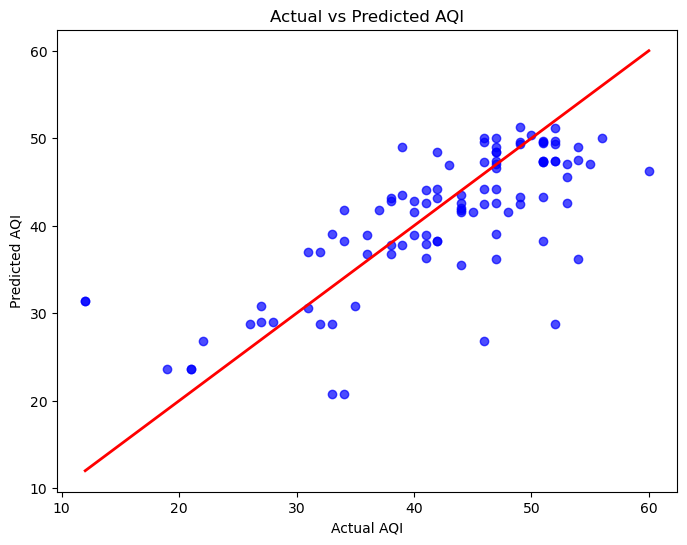

Mean Absolute Error: 4.7546228415508045
R² (Coefficient of Determination): 52.69%


In [165]:
lr_model = linearRegressionModel(df=df)

__**Random Forest**__

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def randomRF(df):
    # Apply one-hot encoding to 'State Name' to convert categorical data to numerical
    df_encoded = pd.get_dummies(df, columns=['State Name'], drop_first=True)

    # Define features (X) and target (y)
    X = df_encoded[['Population', 'Non-Renewable Vehicles'] + [col for col in df_encoded.columns if 'State Name_' in col]]
    y = df_encoded['Overall AQI']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=420)

    # Initialize the RandomForestRegressor
    rf = RandomForestRegressor(random_state=420)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize GridSearchCV with cross-validation and n_jobs=-1 for parallel processing
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_rf = grid_search.best_estimator_

    # Make predictions using the best model
    y_pred = best_rf.predict(X_test)

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R² (coefficient of determination)
    r2 = r2_score(y_test, y_pred)

    # Convert R² to percentage
    r2_percentage = r2 * 100

    # Plotting predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 45-degree line
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title('Actual vs Predicted AQI')
    plt.show()

    # Print Mean Absolute Error and R²
    print("Mean Absolute Error:", mae)
    print(f"R² (Coefficient of Determination): {r2_percentage:.2f}%")

    # Print best hyperparameters
    print("Best hyperparameters found: ", grid_search.best_params_)

    # Return the trained model
    return best_rf


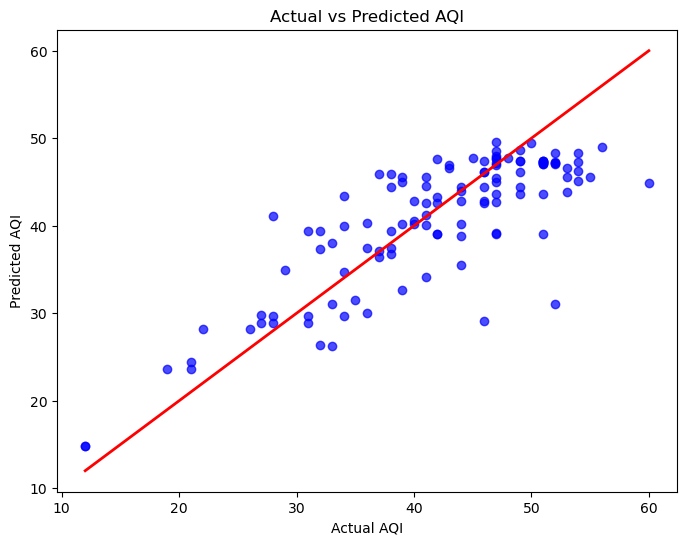

Mean Absolute Error: 4.171344559356263
R² (Coefficient of Determination): 66.14%
Best hyperparameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
rf_model = randomRF(df=df)  # Get the trained model


In [174]:
# Custom prediction function
def predict_aqi(state_name, population, non_renewable_vehicles, model, df):
    
    df = df.dropna()
    df.reset_index(inplace=True)

    # One-hot encode the State Name for the custom input
    df_encoded = pd.get_dummies(df, columns=['State Name'], drop_first=True)

    # Prepare the custom input data
    input_data = pd.DataFrame({
        'Population': [population],
        'Non-Renewable Vehicles': [non_renewable_vehicles],
        'State Name_' + state_name: [1],  # One-hot encode the State Name input
    })
    
    # Ensure all possible one-hot encoded columns are present, fill with 0 for missing states
    for column in df_encoded.columns:
        if column not in input_data.columns:
            input_data[column] = 0

    # Ensure the column names match
    input_data = input_data[['Population', 'Non-Renewable Vehicles'] + [col for col in df_encoded.columns if 'State Name_' in col]]
    
    # Make the prediction
    predicted_aqi = model.predict(input_data)
    return predicted_aqi[0]  # Return the predicted AQI

In [181]:

# Now, make a custom prediction
state_name = "New York"  # Example state
population = 1500  # / 1000
non_renewable_vehicles = 9956000  # Example number of non-renewable vehicles

predicted_aqi = predict_aqi(state_name, population, non_renewable_vehicles, rf_model, df)
print(f"Predicted AQI for {state_name}: {predicted_aqi}")

Predicted AQI for New York: 37.62368147164686
